In [1]:
!rm -rf ./sample_data

In [2]:
# Libraries and Dependencies
!pip install tensorflow opencv-python matplotlib
import tensorflow as tf
import os
import cv2 as cv
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten 
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
data_dir = 'data'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [5]:
!rm -rf ./data/.ipynb_checkpoints/
os.listdir(data_dir)

['spiral', 'wave']

In [6]:
# Some preprocessing
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))


In [7]:
# Reading the Data
data = tf.keras.utils.image_dataset_from_directory('data')

Found 200 files belonging to 2 classes.


In [8]:
data_iterator = data.as_numpy_iterator()

In [9]:
batch = data_iterator.next()

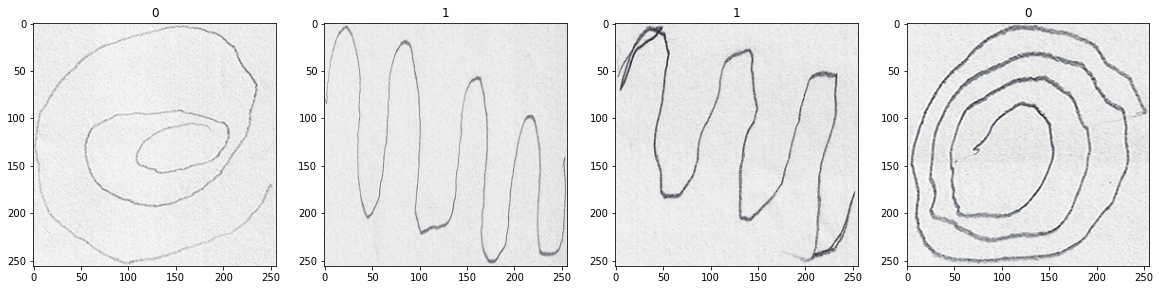

In [10]:
fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [11]:
# 0 = spiral
# 1 = wave

In [12]:
# Scaling the data
data = data.map(lambda x, y: (x/255,y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [13]:
scaled_iterator = data.as_numpy_iterator()

In [14]:
scaled_iterator.next()[0].max()

1.0

In [15]:
len(data)

7

In [17]:
# Splitting the data

train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

train_size + val_size + test_size

7

In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [19]:
# Model
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
#switch sigmoid to relus

In [20]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [22]:
# Training

logdir = 'logs'

In [23]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [24]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks = [tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 12s 263ms/step - loss: 2.0552 - accuracy: 0.5078 - val_loss: 0.7172 - val_accuracy: 0.4844
Epoch 2/20
4/4 [==============================] - 1s 216ms/step - loss: 0.7110 - accuracy: 0.4609 - val_loss: 0.6921 - val_accuracy: 0.5156
Epoch 3/20
4/4 [==============================] - 1s 205ms/step - loss: 0.6930 - accuracy: 0.4766 - val_loss: 0.6879 - val_accuracy: 0.5312
Epoch 4/20
4/4 [==============================] - 1s 211ms/step - loss: 0.7038 - accuracy: 0.4844 - val_loss: 0.7106 - val_accuracy: 0.4844
Epoch 5/20
4/4 [==============================] - 1s 204ms/step - loss: 0.7168 - accuracy: 0.4688 - val_loss: 0.6864 - val_accuracy: 0.4688
Epoch 6/20
4/4 [==============================] - 1s 204ms/step - loss: 0.6887 - accuracy: 0.5312 - val_loss: 0.6898 - val_accuracy: 0.4688
Epoch 7/20
4/4 [==============================] - 1s 249ms/step - loss: 0.6871 - accuracy: 0.5938 - val_loss: 0.6683 - val_accuracy: 0.5312
Epoch 8/20
4/4 [===

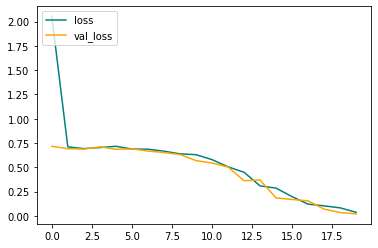

In [25]:
# Plot Performance
fit = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

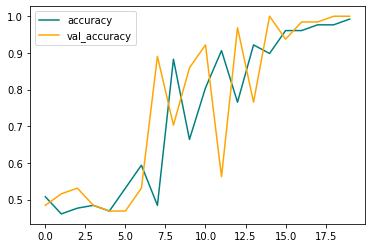

In [26]:
# Plotting Performance
fit = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

In [27]:
# Evaluate Performance
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [28]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 [==============================] - 0s 214ms/step


In [29]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result()}')

Precision: 1.0, Recall:1.0, Accuracy:1.0


In [30]:
# Testing on real world
img = cv.imread('./test/wave/image.png')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

error: ignored

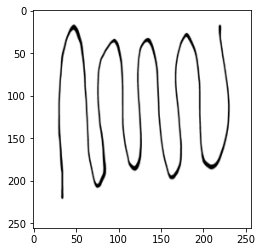

In [ ]:
resize = tf.image.resize(cv.cvtColor(img, cv.COLOR_BGR2RGB), (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 20ms/step


In [ ]:
print(yhat)

if yhat > 0.5:
  print("spiral")
else:
  print("wave")

[[0.9999938]]
spiral


In [31]:
# Saving the model
model.save(os.path.join('model', 'sow.h5'))